In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet as fbp
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use fivethirtyeight plot style
plt.style.use('fivethirtyeight')

In [ ]:
# We will be using amazon share price data which can be downloaded from YAHOO finance website.
df = pd.read_csv('AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-27,15.315000,15.5120,15.131500,15.337500,15.337500,58406000
1,2015-01-28,15.490500,15.5755,15.190000,15.195500,15.195500,61276000
2,2015-01-29,15.236500,15.6400,14.966500,15.589000,15.589000,173132000
3,2015-01-30,17.316000,17.9750,17.037001,17.726500,17.726500,477122000
4,2015-02-02,17.502501,18.2500,17.500500,18.223499,18.223499,204638000


In [ ]:
# add two columnsin dataframe having values as Date and Adj Close
df[['ds', 'y']] = df[['Date', 'Adj Close']]
# Subset two columns from data frame
df = df[['ds', 'y']]

df.head()

,ds,y
0,2015-01-27,15.337500
1,2015-01-28,15.195500
2,2015-01-29,15.589000
3,2015-01-30,17.726500
4,2015-02-02,18.223499


In [ ]:
# split data frame into two parts train and test
split_date = "2019-07-21"
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()


In [ ]:
# Instantiate prophet
model = fbp.Prophet()
# fit the training data
model.fit(df_train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpup_d2oc2/hxe0u0_t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpup_d2oc2/qqv4ebu1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21819', 'data', 'file=/tmp/tmpup_d2oc2/hxe0u0_t.json', 'init=/tmp/tmpup_d2oc2/qqv4ebu1.json', 'output', 'file=/tmp/tmpup_d2oc2/prophet_modelsks7t7hp/prophet_model-20240827171501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:15:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:15:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(df_test)
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1006,2023-07-20,108.893908,-116.044847,344.478995,-126.995624,339.333334,7.124716,7.124716,7.124716,1.287964,1.287964,1.287964,5.836752,5.836752,5.836752,0.0,0.0,0.0,116.018624
1007,2023-07-21,108.906862,-122.813536,346.840552,-127.470630,339.659625,7.006898,7.006898,7.006898,1.132721,1.132721,1.132721,5.874177,5.874177,5.874177,0.0,0.0,0.0,115.913760
1008,2023-07-24,108.945726,-117.822491,346.984447,-127.919726,340.011825,6.951288,6.951288,6.951288,1.053084,1.053084,1.053084,5.898204,5.898204,5.898204,0.0,0.0,0.0,115.897014
1009,2023-07-25,108.958681,-119.359019,347.150753,-128.394731,340.338116,7.161561,7.161561,7.161561,1.282639,1.282639,1.282639,5.878922,5.878922,5.878922,0.0,0.0,0.0,116.120241
1010,2023-07-26,108.971635,-118.599240,347.492601,-128.869737,340.659261,7.144089,7.144089,7.144089,1.296344,1.296344,1.296344,5.847745,5.847745,5.847745,0.0,0.0,0.0,116.115724


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


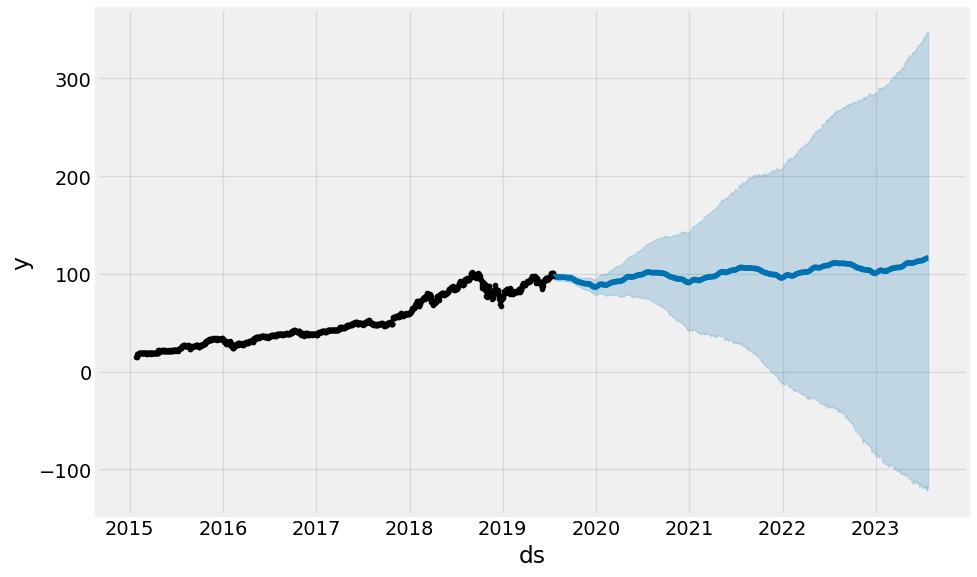

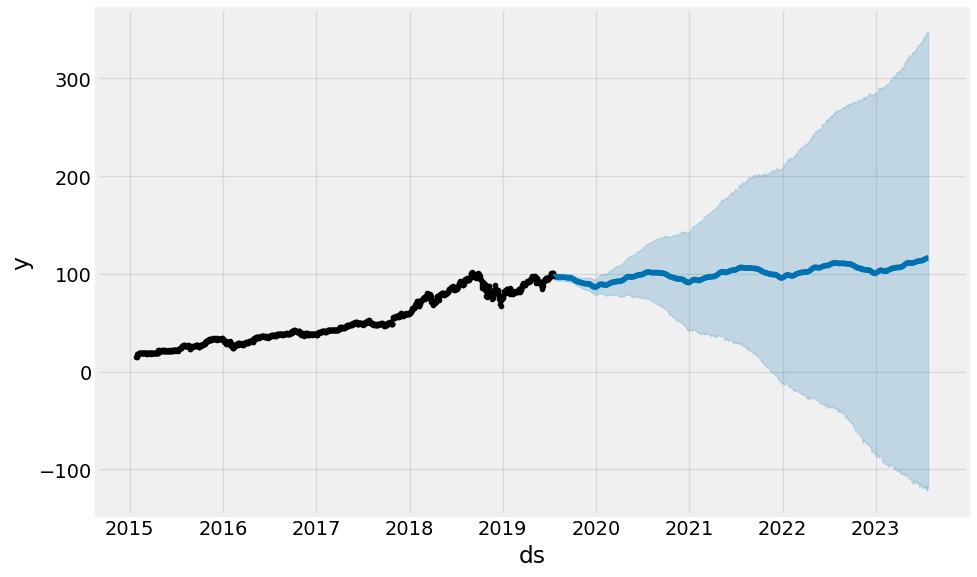

In [ ]:
model.plot(forecast)


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

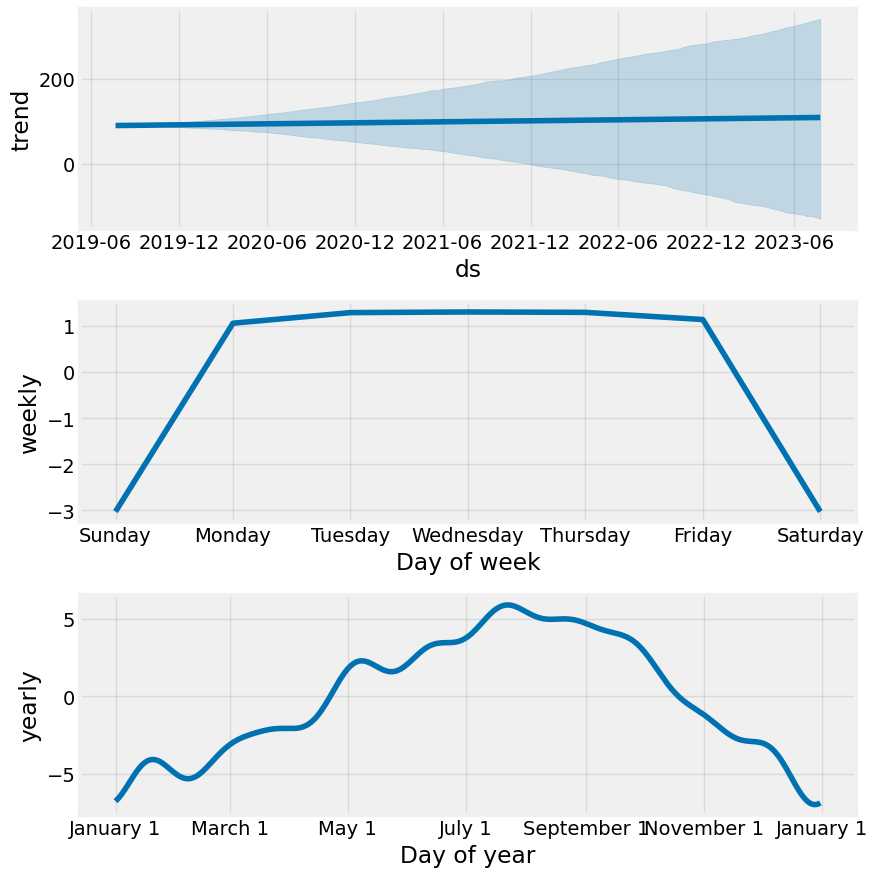

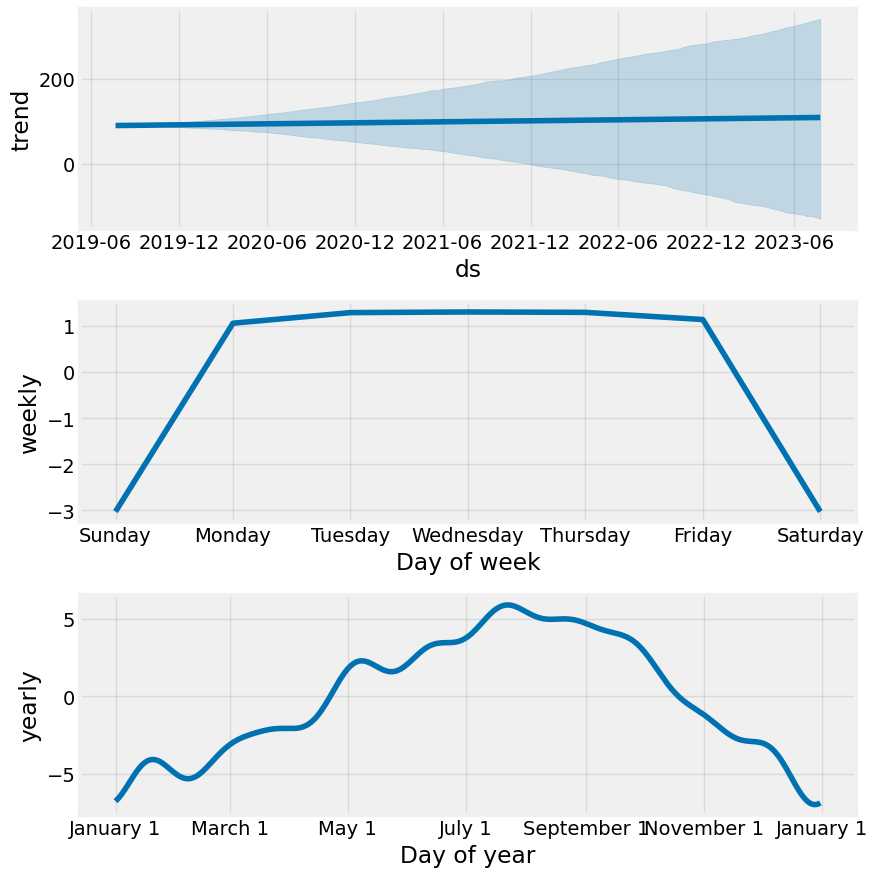

In [ ]:
# plot graphs of different components:
model.plot_components(forecast)


In [ ]:
# code
print("Mean Squared Error (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))


Mean Squared Error (MSE): 1928.5765426797855
Mean Absolute Error (MAE): 34.2779245809425


In [ ]:
def mean_abs_perc_err(y_true, y_pred):
	return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))


Mean Absolute % Error (MAPE):  22.615631700798787
